## [Chapter 5] 회귀

### 01. 회귀 소개

통계학자 갈톤(Galton)은 연구를 통해 사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙을 발견해냈음. 이처럼 데이터 값이 평균과 같은 일정한 값으로 돌아가련느 경향을 이용한 통계학이 회귀 분석. **<font color=orange>머신러닝 회귀 예측의 핵심은 주어진 피쳐와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것.</font>**  
회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나뉘며, 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉨. 가장 많이 사용되는 것은 **선형 회귀로, 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식.**
- 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델.
- 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.
- 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것으로, 피처 선택 기능으로도 불림.
- 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 주링ㅁ과 동시에 L2 규제로 계수 값의 크기를 조정.
- 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델. 매우 강력한 분류 알고리즘이며, 이진 분류뿐만 아니라 텍스트 분류와 같은 희소 영역의 분류에서 뛰어난 예측 성능을 보임.

### 02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀. 예측값 $\widehat{Y}$는 기울기 w1과 절편 w0을 회귀 계수로 지정하여 회귀 모델을 $\widehat{Y}=w_0+w_1+X$로 모델링함. 실제 예측값은 1차 함수 값에서 오류 값을 빼거나 더한 값이 됨.  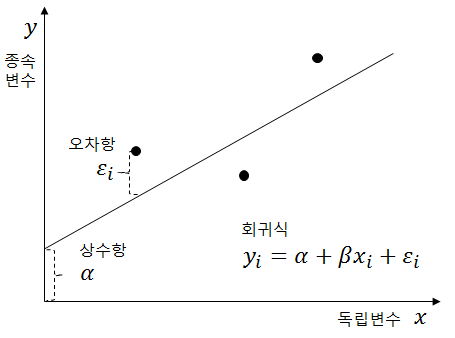  
실제 값과 회귀 모델의 차이에 따른 오류 값을 **잔차**라고 부르며, 최적의 회귀 모델을 만든다는 것은 **전체 데이터의 잔차 합이 최소가 되는 모델**을 만든다는 의미, 즉 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미.  
오류 값은 +, - 모두 가능하기에 단순히 덧셈으로 계산하면 오류 합이 크게 줄어들 수 있으므로 절댓값(MAE) 혹은 제곱을 구해서 합하는 방식(RSS)을 취함. 일반적으로는 미분 등의 계산의 편리함을 위해 RSS(Residual Sum of Square) 방식으로 오류 합을 구함. 즉, $Error^2 = RSS$  
**<font color=orange>$RSS(w_0,w_1) = \frac{1}{N}\sum_{i=1}^N (y_i-(w_0+w_1*x_i))^2$</font>**  
일반적으로 RSS는 학습 데이터의 건수로 나누어서 정규화된 식으로 표현됨. 회귀에서 RSS는 비용이며, 회귀 계수(w)로 구성되는 RSS를 비용 함수 또는 손실 함수(loss function)라고 함. 머신러닝 회귀 알고리즘은 학습을 통해 비용 함수가 반환하는 값을 지속해서 감소시켜 최소의 오류 값을 구하는 것.

### 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

경사 하강법은 고차원 방정식에 대한 문제를 해결해 주면서 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식. **점진적으로** 반복적인 계산을 통해 $w$ 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 $w$ 파라미터를 구하는 방식.  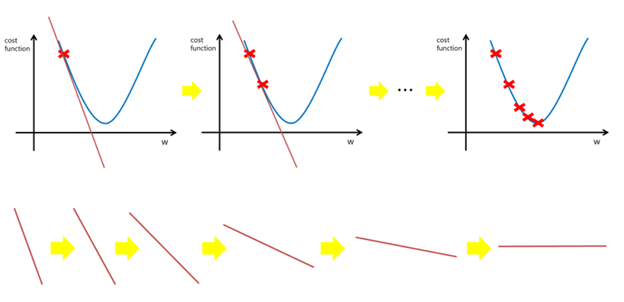  
**<font color=orange>경사 하강법은 반복적으로 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 $w$ 파라미터를 지속해서 보정함. 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 $w$ 값을 최적 파라미터로 반환함.</font>**  
<br/>
< 경사 하강법의 일반적인 프로세스 >
- Step1 : $w_1$, $w_0$ 를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산.
- Step2 : $w_1$ 을 $w_1$+$\eta \frac{2}{N} \sum_{i=1}^N x_i*(실제값_i-예측값_i)$ 으로, $w_0$ 을 $w_0$+$\eta \frac{2}{N} \sum_{i=1}^N x_i*(실제값_i-예측값_i)$ 으로 업데이트한 후 다시 비용 함수의 값을 계산.
- Step3 : 비용 함수의 값이 감소했으면 다시 Step2를 반복하여 더 이상 비용 함수의 값이 감소하지 않을 때의 $w_1$, $w_0$ 를 구하고 반복을 중지.

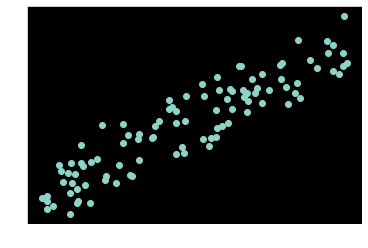

In [2]:
# 샘플 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)
plt.show()

In [3]:
# 비용함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [6]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_updqte, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # wo_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
        
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [31]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용(경사 하강 방식 적용)

def gradient_descent_steps(X, y, iters=10000):
    
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()를 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [32]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


→ 실제 선형식 $y = 4X+6$ 과 유사하게 도출되었으며, 예측 오류 비용은 약 0.9935.

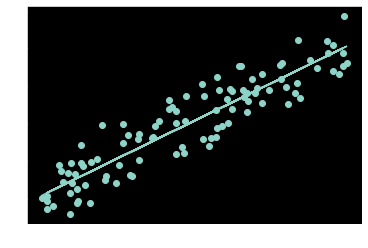

In [33]:
plt.scatter(X, y)
plt.plot(X,y_pred)
plt.show()

→ 일반적으로 경사 하강법은 수행 시간이 매우 오래 걸리기 때문에, **<font color=orange>실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용함.</font>** 일부 데이터만 이용해 w가 없데이트 되는 값을 계산하는 것.

In [34]:
# 확률적 경사 하강법 함수 생성

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [35]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


→ 확률적 경사 하강법으로 구한 결과가 경사 하강법으로 구한 결과와 큰 차이가 없음. 큰 데이터를 처리할 경우 확률적 경사 하강법을 이용하는 것이 일반적임. 추가적으로, 피처가 여러 개인 경우는 피처가 1개인 경우를 확장하면 됨.

### 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 에측

#### LinearRegression 클래스 - Ordinary Least Squares
LinearRegression 클래스는 에측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스로, fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수인 W를 coef_ 속성에 저장함.
- 입력 파라미터
    - fit_intercept : intercept 값을 계산할 것인지 말지를 지정하는 불린 값으로, 디폴트는 True.
    - normalize : 디폴트는 False이며, True일 경우 회귀를 수행하기 전 입력 데이터 세트를 정규화함. fit_intercept가 False인 경우에는 무시됨.
- 속성
    - coef_ : (Target 값 개수, 피처 개수) 형태로 출력되며, fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성.
    - intercept_ : intercept값.

</br>

**< 회귀 평가 지표>**
- **MAE** : Mean Absolute Error. 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것.  
→ 사이킷런 평가 지표 API : metrics.mean_absolute_error  
→ Scoring 함수 적용 값 : 'neg_mean_absolute_error'  
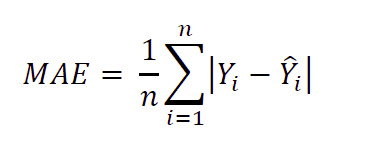
- **MSE** : Mean Squared Error. 실제 값과 예측값의 차이를 제곱해 평균한 것.  
→ 사이킷런 평가 지표 API : metrics.mean_squared_error  
→ Scoring 함수 적용 값 : 'neg_mean_squared_error'  
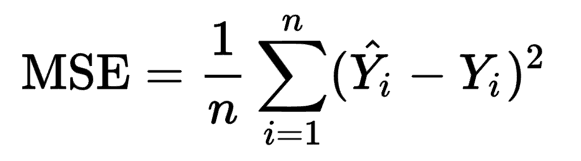
- **RMSE** : Root Mean Squared Error. MSE 값은 오류의 제곱을 구하므로 실제 오류보다 더 커지는 특성이 있으므로, MSE에 루트를 씌운 것.  
→ 사이킷런에서 제공하지 않으므로, 직접 구현해야 함.  
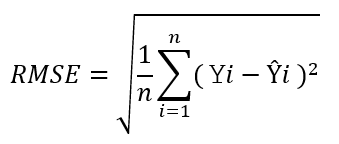
- **R$^2$** : 분산 기반으로 예측 성능을 평가함. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음을 뜻함.  
→ 사이킷런 평가 지표 API : metrics.r2_score  
→ Scoring 함수 적용 값 : 'r2'
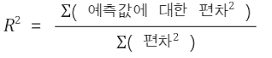
</br>  
</br>

*cf) scoring 적용 값에 'neg_'가 붙는 이유는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이기 때문에 음수 값을 취해주는 것.*

#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


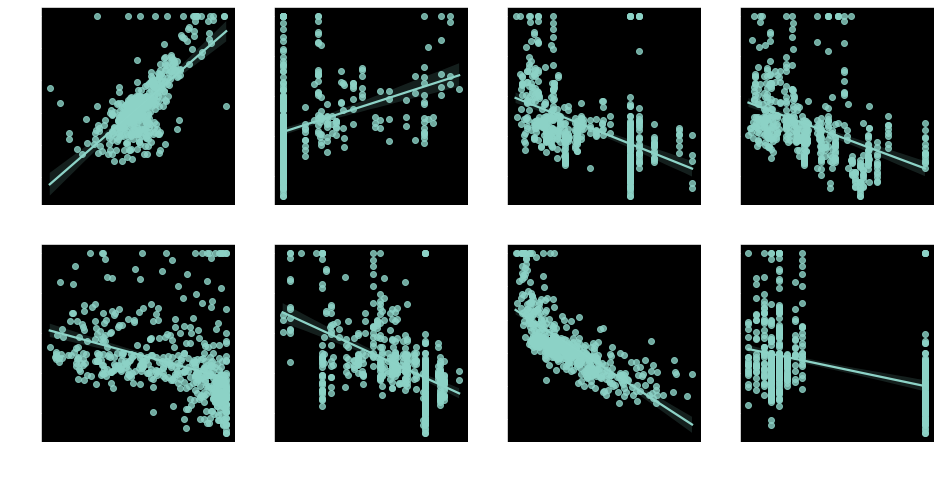

In [39]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [41]:
# LinearRegression으로 생성한 주택가격 모델의 intercept 와 coefficients 값 확인
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164705
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [42]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [43]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # -1을 곱해야 원래 모델에서 계산된 MSE 값임.
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


### 05. 다항 회귀와 과적합/과소적합 이해

#### 다항 회귀 이헤
**다항(Polynomial) 회귀** : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것.  
→ $y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1^2 + w_5*x_2^2$  
다항 회귀를 비선형 회귀로 혼동하기 쉬우나 **<font color=orange>다항 회귀는 선형 회귀임을 주의할 것.** 회귀에서 선형 회귀/비선형 회귀 판단 여부는 독립 변수의 선형 여부가 아닌 회귀 계수의 선형 여부이기 때문.

In [44]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [46]:
# 3차 다항 회귀의 결정 함수식 설정을 위한 함수 생성

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [47]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [49]:
'''
앞 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하기 보다는
사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 더 바람직함.
'''

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합(Underfitting) 및 과적합(Overfitting) 이해

In [50]:
# 차수가 높아질수록 과적합이 나는 것을 확인하기 위한 예제

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417000e+06  2.03717200e+07
 -1.44874017e+08  7.09319141e+08 -2.47067172e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920642e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.83 입니다.


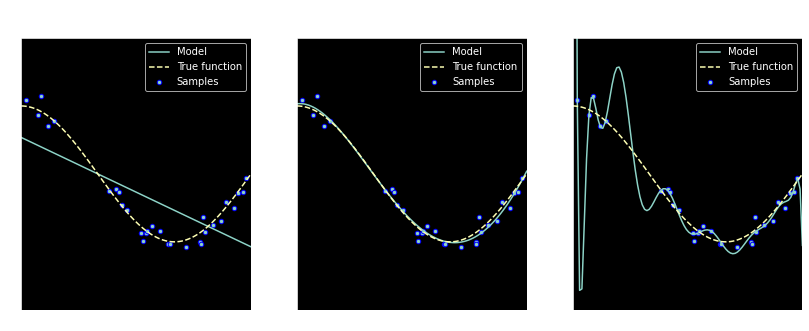

In [51]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측수행 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교 
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

→ Degree 4 인 경우가 MSE 값도 가장 낮으며, 예측 곡선이 실제 데이터와 유사한 모습임.  
<br/>
좋은 예측 모델은 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아닌, 모든 학습 데이터의 패턴을 하나하나 감안한 복잡한 과적합 모델도 아닌, 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델.

#### 편향-분산 트레이드오프(Bias-Cariance Trade off)

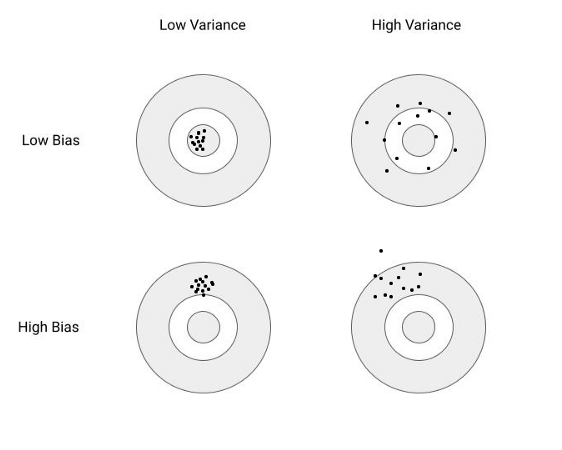  
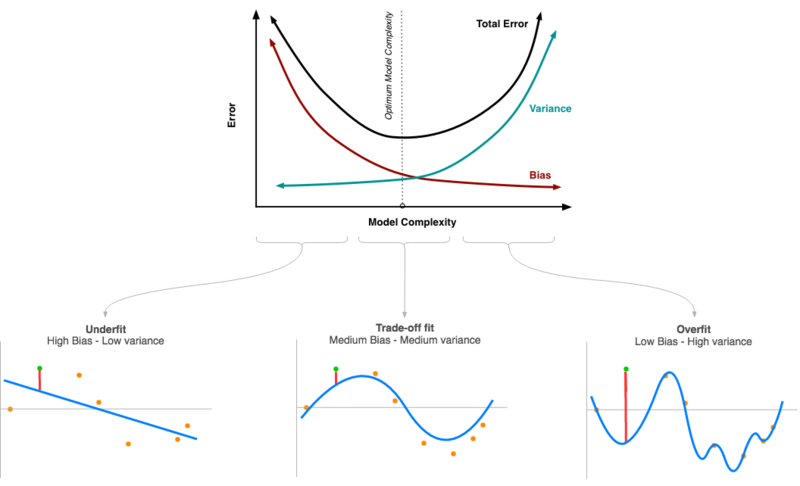  
일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음. **편향이 높으면 분산은 낮아져 과소적합되기 쉬우며, 분산이 높으면 편향이 낮아져 과적합되기 쉬움.** 위으 그래프를 보면 알 수 있듯이, 편향이 너무 높으면 전체 오류가 높음. 편향을 점점 낮추면 동시에 분산이 높아지며, 전체 오류도 낮아짐. 그러나 전체 오류가 가장 낮아지는 **'골디락스'** 지점을 통과한 후에도 분산을 높이면 전체 오류값이 다시 증가하며 예측 성능이 다시 저하됨. 즉, 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적임.